In [44]:
# Import Libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we create

# Read in the data
df = pd.read_csv(r'C:\Users\Akhilesh\OneDrive\Documents\Akhilesh\Data Analysis\Python\Movies_Project\movies.csv')

In [45]:
# It is preferrable as it reduces the data printed to inly the first 5 columns which reduces the storage space used

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [20]:
# Checking if there is any any missing data in any of the columns

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [21]:
df.size

115020

In [22]:
df1 = df.dropna()
df1.size

81315

In [23]:
# Checking if there is any any missing data in any of the columns

for col in df1.columns:
    pct_missing = np.mean(df1[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [46]:
# Change datatype of columns

# Fill NaN values with a default value (e.g., 0)
df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')



In [47]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [48]:
import re

# Convert the 'released' column to strings (if necessary)
df['released'] = df['released'].astype(str)

# Remove the country name part from the 'released' column (using regex)
df['release_date'] = df['released'].apply(lambda x: re.sub(r'\s*\(.*\)', '', x))

# Convert the cleaned 'released' column to datetime format without specifying the format
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Extract the year from the cleaned 'released' column
df['released_year'] = df['release_date'].dt.year
df['released_year'] = df['released_year'].fillna(0).astype('int64')

# Compare the 'year' column with the extracted year from 'released'
df['year_match'] = df['year'] == df['released_year']

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,released_year,year_match
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980,True
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980,True
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980,True
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980,True
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980,True


In [49]:
# Checking if there any discrepencies in the values by looking if there are any values with False in the 'year_match' column
# If we get that there are values with False stored, then it means that the year in release date and release year, do no match

has_false = (df['year_match'] == False).any()

if has_false:
    print("There are False values in the 'year_match' column.")
else:
    print("There are no False values in the 'year_match' column.")

There are False values in the 'year_match' column.


In [50]:
# Correcting the year column in our main dataset and removing unnecessary columns

df['year_correct'] = df['release_date'].astype(str).str[:4]
df.drop(columns=['released_year', 'year_match'], inplace=True)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year_correct
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [43]:
# Sorting the table in the order of highest grossing movies

df = df.sort_values(by=['gross'], inplace=False, ascending=False)
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year_correct
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018


In [9]:
# This sets a sliding bar for the table which is a convinient option instead of displaying the whole table at once

pd.set_option('display.max_rows', None)

In [31]:
# Sorting out all the unoque values of the companies in the dataset

# Using head() as it displays a very long list, remove head() to view the whole list

(df['company'].drop_duplicates().sort_values(ascending=False)).head(20)

7129                          thefyzz
5664                      micro_scope
6412         iDeal Partners Film Fund
4007                         i5 Films
6793                       i am OTHER
6420                             erbp
3776                   double A Films
524         Zupnik-Curtis Enterprises
3330      Zucker Brothers Productions
520                  Zoetrope Studios
2213               Zeta Entertainment
6222    Zentropa International Norway
3698          Zentropa Entertainments
1175             Zenith Entertainment
5180                  Zazen Produções
3193                      ZapPictures
1321         Zanuck/Brown Productions
1329      Zacharias-Buhai Productions
789         Young Sung Production Co.
5125       Young Hannibal Productions
Name: company, dtype: object

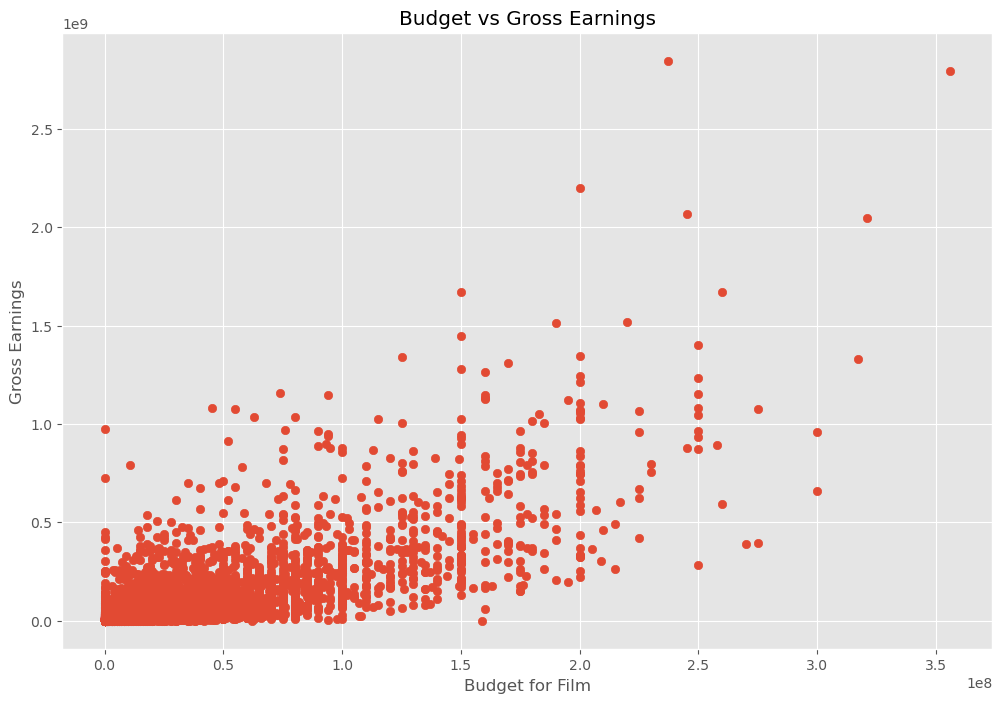

In [32]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Budget for Film')

plt.ylabel('Gross Earnings')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

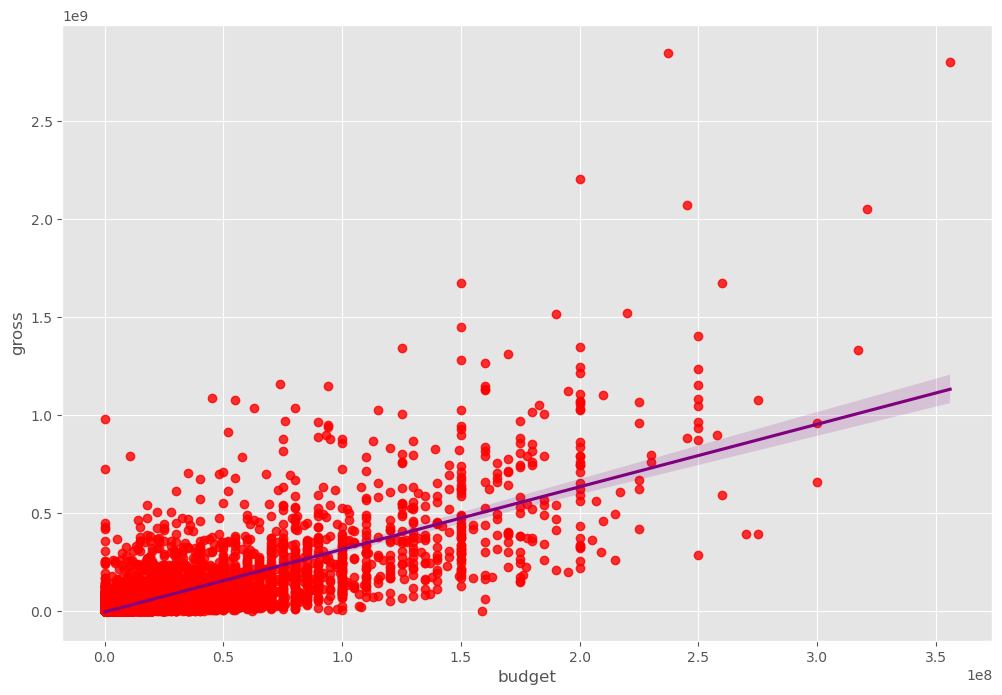

In [33]:
# Plot Budget vs Gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color" : "red"}, line_kws={"color" : "purple"})

In [34]:
# Finding the correlation between the columns

df.corr(method='pearson')  # pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


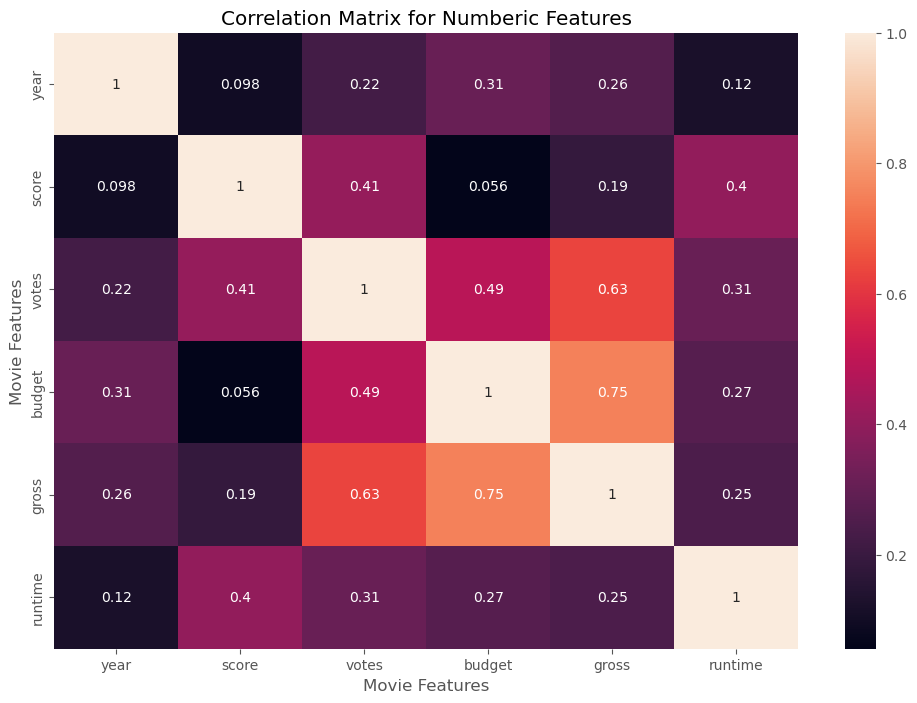

In [35]:
# There is a high correlation between Budget and Gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numberic Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [36]:
df.dtypes

name                    object
rating                  object
genre                   object
year                     int64
released                object
score                  float64
votes                  float64
director                object
writer                  object
star                    object
country                 object
budget                   int64
gross                    int64
company                 object
runtime                float64
release_date    datetime64[ns]
year_correct            object
dtype: object

In [37]:
# Convert categorical columns to integer codes for numerical encoding in the DataFrame.

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_date,year_correct
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009-12-18,29
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019-04-26,39
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997-12-19,17
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015-12-18,35
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018-04-27,38


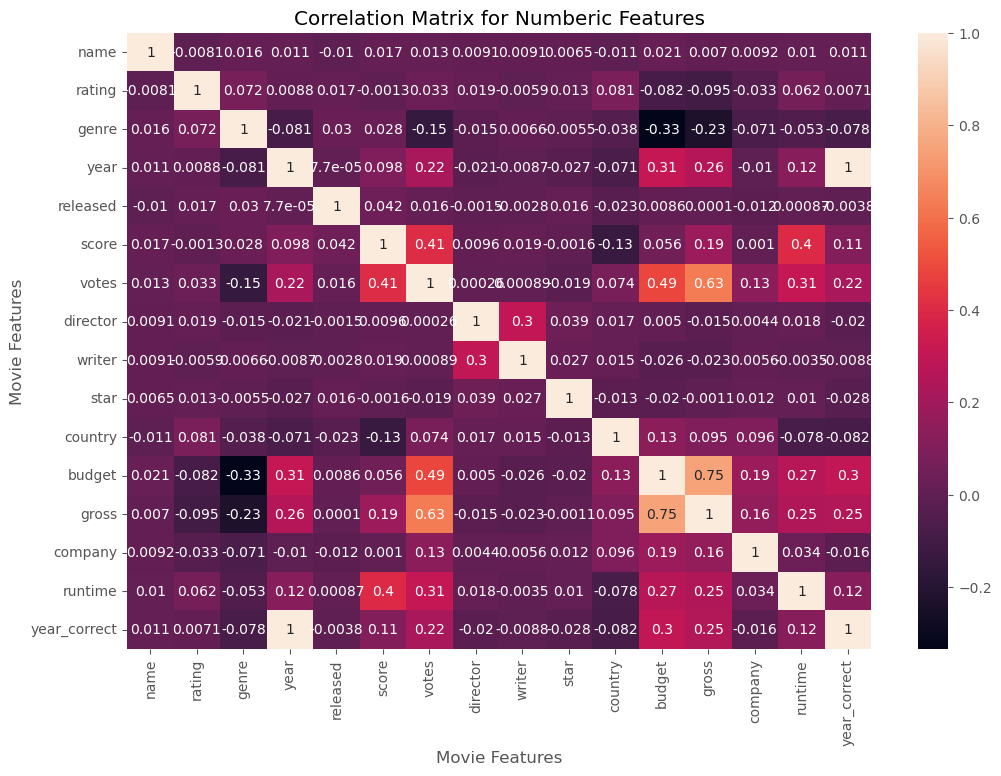

In [38]:
# Scatter plot with budget vs gross

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numberic Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [39]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
name,1.000000,-0.008069,0.016355,0.011453,-0.010480,0.017097,0.013088,0.009079,0.009081,0.006472,-0.010737,0.020548,0.006989,0.009211,0.010392,0.011134
rating,-0.008069,1.000000,0.072423,0.008779,0.017208,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095450,-0.032943,0.062145,0.007054
genre,0.016355,0.072423,1.000000,-0.081261,0.030429,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.234297,-0.071067,-0.052711,-0.077550
year,0.011453,0.008779,-0.081261,1.000000,0.000077,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.997295
released,-0.010480,0.017208,0.030429,0.000077,1.000000,0.042148,0.016154,-0.001526,-0.002784,0.015805,-0.023408,0.008552,0.000100,-0.012269,0.000868,-0.003819
score,0.017097,-0.001314,0.027965,0.097995,0.042148,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105601
votes,0.013088,0.033225,-0.145307,0.222945,0.016154,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218364
director,0.009079,0.019483,-0.015258,-0.020795,-0.001526,0.009559,0.000260,1.000000,0.299067,0.039234,0.017490,0.004976,-0.014916,0.004404,0.017624,-0.020439
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002784,0.019416,0.000892,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.022997,0.005646,-0.003511,-0.008807
star,0.006472,0.013405,-0.005477,-0.027242,0.015805,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.001129,0.012442,0.010174,-0.027576


In [40]:
# Get the correlation in pairs of values from the numerized dataset

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

(corr_pairs).head(15)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.010480
      score       0.017097
      votes       0.013088
      director    0.009079
      writer      0.009081
      star        0.006472
      country    -0.010737
      budget      0.020548
      gross       0.006989
      company     0.009211
      runtime     0.010392
dtype: float64

In [41]:
sorted_pairs = corr_pairs.sort_values()

(sorted_pairs).head(15)

budget        genre          -0.334021
genre         budget         -0.334021
              gross          -0.234297
gross         genre          -0.234297
votes         genre          -0.145307
genre         votes          -0.145307
score         country        -0.133348
country       score          -0.133348
gross         rating         -0.095450
rating        gross          -0.095450
year_correct  country        -0.082274
country       year_correct   -0.082274
budget        rating         -0.081939
rating        budget         -0.081939
genre         year           -0.081261
dtype: float64

In [42]:
# Separating the pairs with higher correlation

high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes         gross           0.632834
gross         votes           0.632834
budget        gross           0.750157
gross         budget          0.750157
year_correct  year            0.997295
year          year_correct    0.997295
name          name            1.000000
company       company         1.000000
gross         gross           1.000000
budget        budget          1.000000
country       country         1.000000
star          star            1.000000
writer        writer          1.000000
director      director        1.000000
votes         votes           1.000000
score         score           1.000000
released      released        1.000000
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
dtype: float64

In [43]:
# Votes and Budget have the highest correlation to Gross earnings

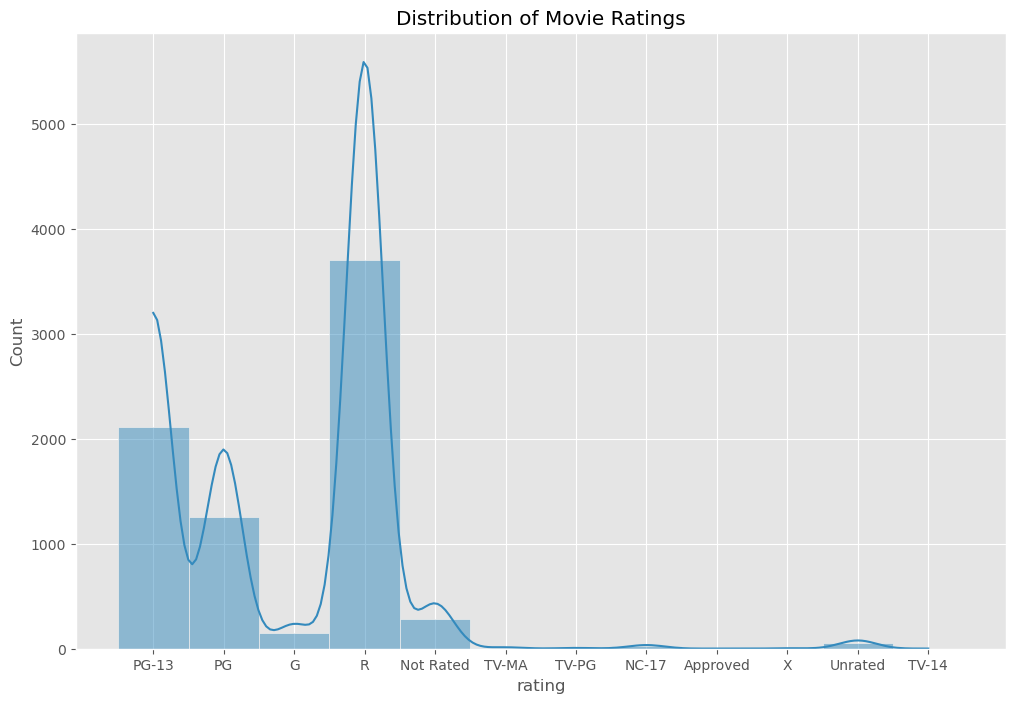

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of movie ratings
sns.histplot(df['rating'], kde=True)
plt.title('Distribution of Movie Ratings')
plt.show()


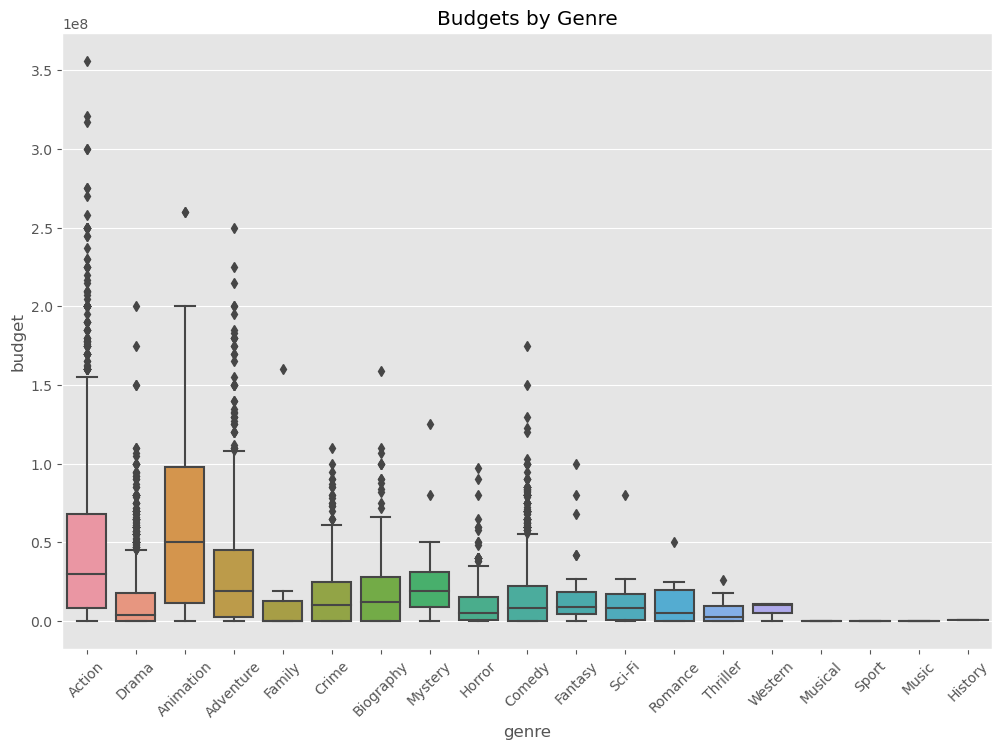

In [12]:
# Box plot of budgets by genre
sns.boxplot(x='genre', y='budget', data=df)
plt.title('Budgets by Genre')
plt.xticks(rotation=45)
plt.show()

In [57]:
# Import Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)  # Adjusts the configuration of the plots we create


In [58]:
# Check for remaining missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill any remaining missing values if necessary
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['gross'].median())

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64


In [59]:
# Remove outliers from budget column

Q1 = df['budget'].quantile(0.25)
Q3 = df['budget'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['budget'] < (Q1 - 1.5 * IQR)) | (df['budget'] > (Q3 + 1.5 * IQR)))]

In [61]:
# Normalize the budget and gross columns.

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['budget', 'gross']] = scaler.fit_transform(df[['budget', 'gross']])

In [62]:
# Create a new 'profit' column

df['profit'] = df['gross'] - df['budget']

In [64]:
# Select features and target variable
features = ['budget', 'score', 'votes']
target = 'gross'

X = df[features]
y = df[target]

from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

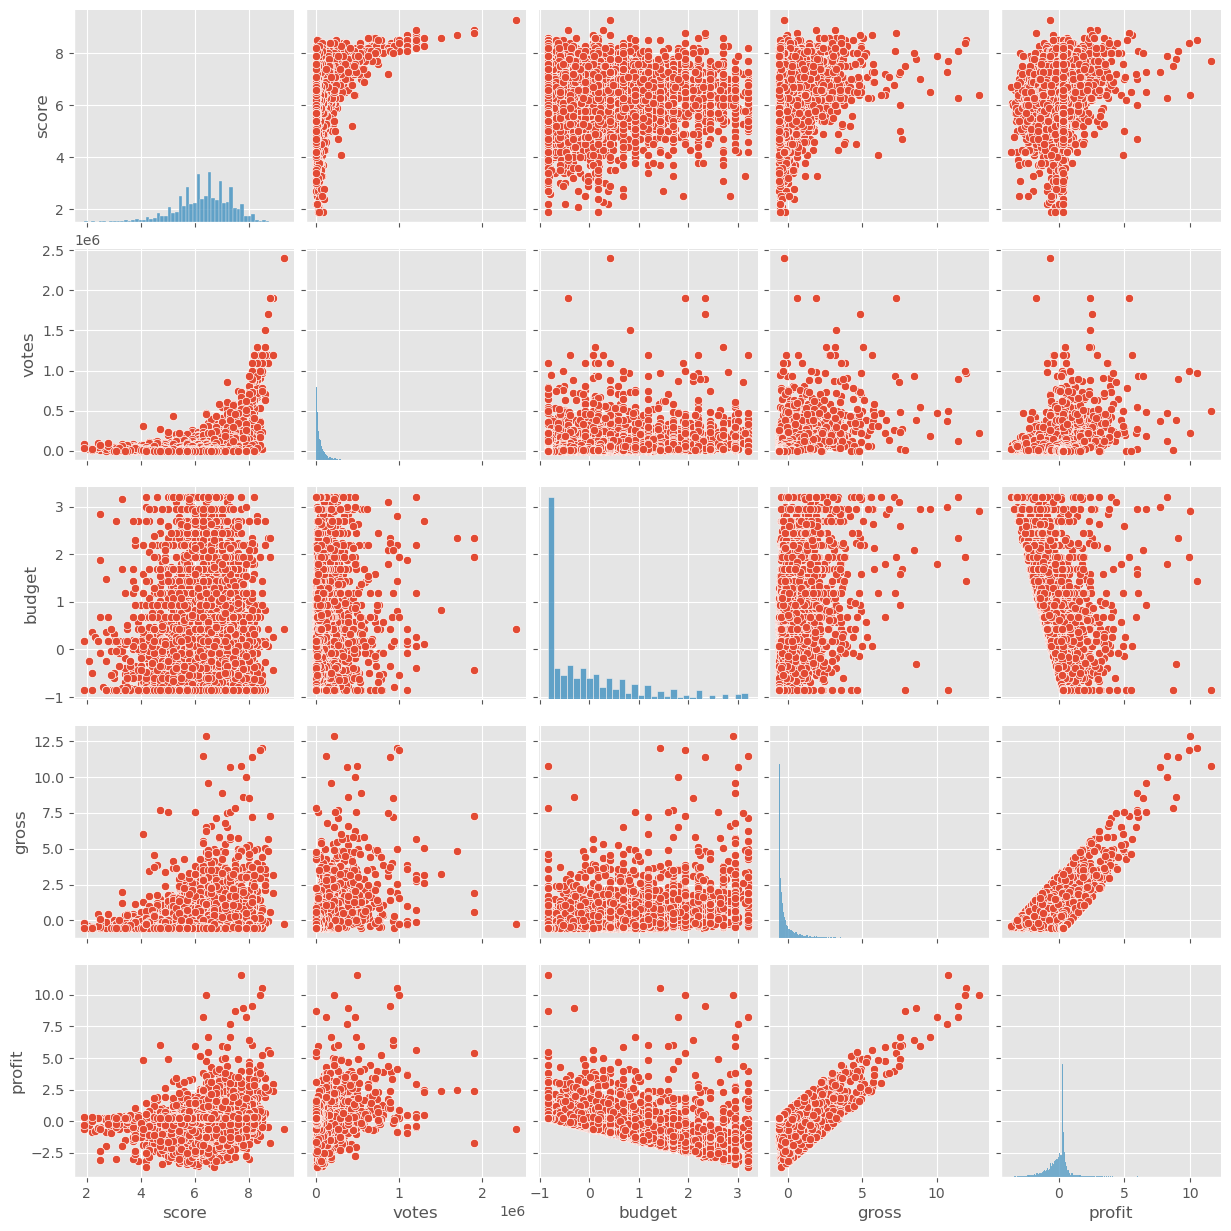

In [32]:
sns.pairplot(df[['score', 'votes', 'budget', 'gross', 'profit']])
plt.show()

In [69]:
# Ensure numeric columns are properly converted and cleaned
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce')
df['score'] = pd.to_numeric(df['score'], errors='coerce')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Fill NaN values with median or 0
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Clip extremely large values
df[numeric_cols] = df[numeric_cols].clip(lower=df[numeric_cols].min(), upper=np.finfo(np.float64).max, axis=1)

Mean Squared Error: 8656775824631578.0
R-squared: 0.6749544293489433


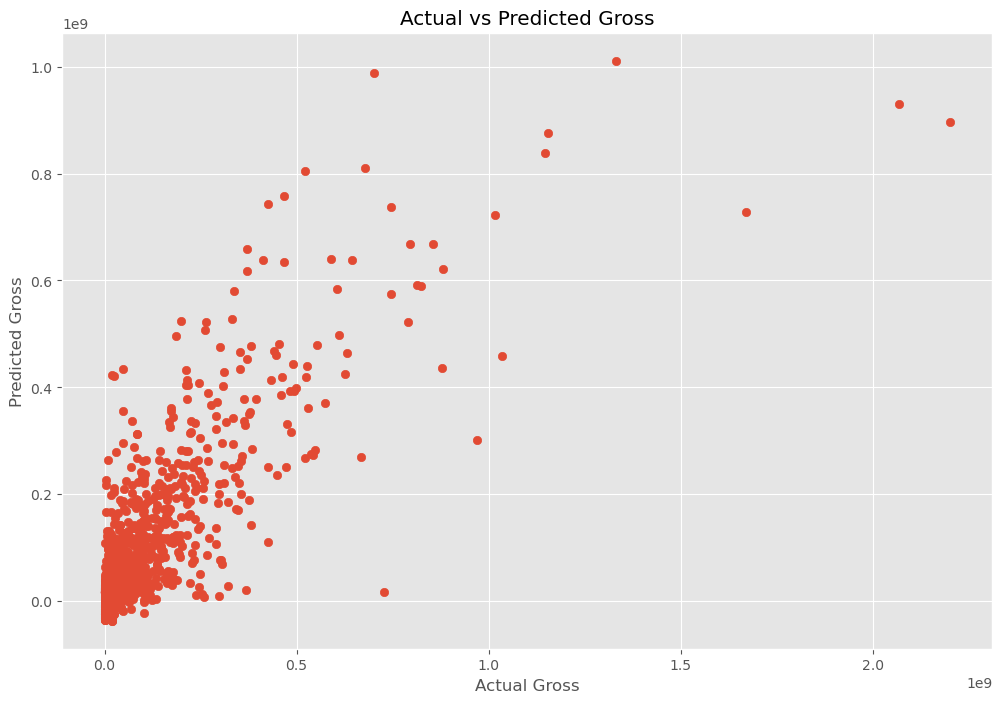

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Select features and target variable
features = ['budget', 'score', 'votes']
target = 'gross'

X = df[features]
y = df[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Visualize the results
plt.scatter(y_test, predictions)
plt.xlabel('Actual Gross')
plt.ylabel('Predicted Gross')
plt.title('Actual vs Predicted Gross')
plt.show()

In [71]:
# Key Findings:

#The budget and gross columns showed a significant number of missing values, indicating the need for careful handling of these columns in the analysis.

# The linear regression model provided insights into how well the selected features could predict the gross revenue, with the evaluation metrics indicating the model's performance.

# The pair plots revealed patterns and correlations between the variables, such as how budget and votes might relate to the gross revenue.